# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Predict Sentiment From Movie Reviews



# Import modules
<hr style="border:2px solid black"> </hr>

In [19]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D

### Load the data set & analysis

In [4]:
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [10]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

# Summarize review length
print("Review length: ")
result = list(map(len, X))
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))



Training data: 
(50000,)
(50000,)
Classes: 
[0 1]
Number of words: 
88585
Review length: 
Mean 234.76 words (172.911495)


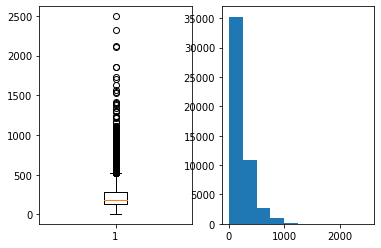

In [11]:
# plot review length as a boxplot and histogram
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

In [ ]:
"""
Looking at the box and whisker plot and the histogram for the review lengths in words, we can probably see 
an exponential distribution that we can probably cover the mass of the distribution with a clipped length 
of 400 to 500 words
"""

### Simple Multilayer Perceptron Model

In [ ]:
"""
A recent breakthrough in the field of natural language processing is called word embedding. This is a technique 
where words are encoded as real-valued vectors in a high dimensional space, where the similarity between words 
in terms of meaning translates to closeness in the vector space.
"""

In [17]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation= "relu" ))
model.add(Dense(1, activation= "sigmoid" ))
model.compile(loss= "binary_crossentropy" , optimizer= "adam" , metrics=["accuracy"])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
196/196 [==============================] - 8s 40ms/step - loss: 0.5110 - accuracy: 0.7149 - val_loss: 0.3008 - val_accuracy: 0.8718
Epoch 2/2
196/196 [==============================] - 8s 41ms/step - loss: 0.1955 - accuracy: 0.

In [ ]:
"""
I’m sure we can do better if we trained this network, perhaps using a larger embedding and adding more hidden 
layers. Let’s try a di↵erent network type.
"""

### One-Dimensional Convolutional Neural Network

In [ ]:
"""
Convolutional neural networks were designed to honor the spatial structure in image data whilst being robust to
the position and orientation of learned objects in the scene. This same princip can be used on sequences, such 
as the one-dimensional sequence of words in a movie review. The same properties that make the CNN model 
attractive for learning to recognize objects in images can help to learn structure in paragraphs of words,
namely the techniques invariance to the specific position of features
"""

In [25]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))

#model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode= "same" ,activation= "relu" ))
model.add(Convolution1D(filters =32, kernel_size=3, padding = "same", activation= "relu" ))

#model.add(MaxPooling1D(pool_length=2))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(250, activation= "relu" ))
model.add(Dense(1, activation= "sigmoid" ))
model.compile(loss= "binary_crossentropy" , optimizer= "adam" , metrics=["accuracy"])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,verbose=1)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [ ]:
"""
Again, there is a lot of opportunity for further optimization, such as the use of deeper and/or larger 
convolutional layers. One interesting idea is to set the max pooling layer to use an input length of 500. 
This would compress each feature map to a single 32 length vector and may boost performance.
"""

# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/
- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

